# CX 4230, Spring 2016: [09] Cellular Automata

The following exercises accompany the class slides on Wolfram's 1-D nearest neighbor cellular automata model. You can download a copy of those slides here: [PDF (0.7 MiB)](https://t-square.gatech.edu/access/content/group/gtc-59b8-dc03-5a67-a5f4-88b8e4d5b69a/cx4230-sp16--09-cellular-automata.pdf)

## Setup

In [1]:
import numpy as np
import scipy as sp
import scipy.sparse

In [2]:
import matplotlib.pyplot as plt # Core plotting support
%matplotlib inline

def show_grid (grid):
    plt.matshow (grid)

## Wolfram's 1-D near-neighbor CA

Let's evolve a 1-D region of length `N` over `T` time steps.

Start by creating a 2-D Numpy array (or _matrix_) `X[0:N, 0:T]`, which will eventually hold the sequence of all state changes over time. Our convention will be to store either a `0` or a `1` value in every cell.

In [3]:
N = 10
T = 20

X = np.zeros ((N, T), dtype=int)  # X[i, t] == cell i at time t

As the initial state of the 1-D system, let's put a single `1` bit at or close to the center.

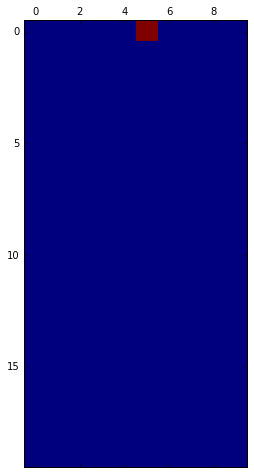

In [4]:
# Initial conditions
i_center = int (X.shape[0]/2)
X[i_center, 0] = 1
show_grid (X.transpose ())

## Sparse matrices

Suppose you are given a 1-D neighborhood as a 3-bit pattern, `011`$_2$. This value is the binary representation of the decimal value, $(2^2 \cdot 0) + (2^1 \cdot 1) + (2^0 \cdot 1) = 3$. More generally, given a 3-bit string, $b_2b_1b_0$, let its _neighborhood index_ be the decimal integer $k$ such that

$$
  k \equiv (4 \cdot b_2) + (2 \cdot b_1) + (1 \cdot b_0).
$$

Given one of Wolfram's rules, you could then build a lookup table to convert every possible neighborhood index into the corresponding `0` or `1` state.

To implement this idea, try this notional trick from linear algebra. Let $\vec{x}$ denote the 1-D grid of $n$ cells, represented as a _vector_ of $n$ bits,

$$\begin{eqnarray}
  \vec{x}
    & = &
      \left(\begin{array}{c}
        x_0 \\
        x_1 \\
        \vdots \\
        x_{n-1}
      \end{array}\right).
\end{eqnarray}$$

From this vector, you can enumerate all neighborhood indices using a _(sparse) matrix-vector product_. Let $k_i$ denote the neighborhood index of cell (bit) $x_i$. Then,

$$\begin{eqnarray}
  k_0 & = & 2 x_0 + x_1 \\
  k_1 & = & 4 x_0 + 2 x_1 + x_2 \\
  k_2 & = & 4 x_1 + 2 x_2 + x_3 \\
      & \vdots & \\
  k_i & = & 4 x_{i-1} + 2 x_i + x_{i+1} \\
      & \vdots & \\
  k_{n-2} & = & 4 x_{n-3} + 2 x_{n-2} + x_{n-1} \\
  k_{n-1} & = & 4 x_{n-2} + 2 x_{n-1}
\end{eqnarray}$$

This system of equations can be written in matrix form as $\vec{k} \equiv A \cdot \vec{x}$, where

$$
\vec{k} \equiv \left(\begin{array}{c}
                 k_0 \\
                 k_1 \\
                 k_2 \\
                 \vdots \\
                 k_i \\
                 \vdots \\
                 k_{n-2} \\
                 k_{n-1}
               \end{array}\right)
=
  \underbrace{\left(\begin{array}{cccccccc}
    2 & 1 &   &        &   &        &   & \\
    4 & 2 & 1 &        &   &        &   & \\
      & 4 & 2 & 1      &   &        &   & \\
      &   &   & \ddots &   &        &   & \\
      &   &   &    4   & 2 & 1      &   & \\
      &   &   &        &   & \ddots &   & \\
      &   &   &        &   &    4   & 2 & 1 \\
      &   &   &        &   &        & 4 & 2
  \end{array}\right)}_{\equiv A}
\cdot
  \underbrace{\left(\begin{array}{c}
                 x_0 \\
                 x_1 \\
                 x_2 \\
                 \vdots \\
                 x_i \\
                 \vdots \\
                 x_{n-2} \\
                 x_{n-1}
               \end{array}\right)}_{= \vec{x}}.
$$

The matrix $A$ is _sparse_ because it is mostly zero.

> Sparsity does not have a precise formal definition. However, one typically expects that the number of non-zeros in $n \times n$ sparse matrix $A$ is $\mathrm{nnz}(A) = \mathcal{O}(n)$.

In fact, $A$ has a more specific structure: it is _tridiagonal_, meaning that all of its non-zero entries are contained in the diagonal of $A$ plus the first sub- and super-diagonals.

Numpy and Scipy, Numpy's "parent" library, have an especially handy function, `scipy.sparse.diags()`, which can easily construct sparse matrices consisting only of diagonals:  http://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.diags.html#scipy.sparse.diags

Here is a one-line statement to construct a sparse matrix $A$ as the variable `A`, which references a sparse matrix object.

In [5]:
A = sp.sparse.diags ([4, 2, 1], [-1, 0, 1], shape=(N, N), dtype=int)

In [6]:
print ("=== A (sparse) ===", A, sep="\n")

=== A (sparse) ===
  (1, 0)	4
  (2, 1)	4
  (3, 2)	4
  (4, 3)	4
  (5, 4)	4
  (6, 5)	4
  (7, 6)	4
  (8, 7)	4
  (9, 8)	4
  (0, 0)	2
  (1, 1)	2
  (2, 2)	2
  (3, 3)	2
  (4, 4)	2
  (5, 5)	2
  (6, 6)	2
  (7, 7)	2
  (8, 8)	2
  (9, 9)	2
  (0, 1)	1
  (1, 2)	1
  (2, 3)	1
  (3, 4)	1
  (4, 5)	1
  (5, 6)	1
  (6, 7)	1
  (7, 8)	1
  (8, 9)	1


In [7]:
print ("=== A (dense) ===", A.toarray (), sep="\n")

=== A (dense) ===
[[2 1 0 0 0 0 0 0 0 0]
 [4 2 1 0 0 0 0 0 0 0]
 [0 4 2 1 0 0 0 0 0 0]
 [0 0 4 2 1 0 0 0 0 0]
 [0 0 0 4 2 1 0 0 0 0]
 [0 0 0 0 4 2 1 0 0 0]
 [0 0 0 0 0 4 2 1 0 0]
 [0 0 0 0 0 0 4 2 1 0]
 [0 0 0 0 0 0 0 4 2 1]
 [0 0 0 0 0 0 0 0 4 2]]


As a sanity check, let's multiply $A$ by the initial 1-D grid. Denote this initial grid mathematically as $\vec{x}(t=0)$, which is just the first column of the array `X`, i.e., `X[:, 0]`.

**Exercise.** Compute $\vec{k}(0) \leftarrow A \cdot \vec{x}(0)$ by hand.

In [8]:
print (X[:, 0])

[0 0 0 0 0 1 0 0 0 0]


> Answer: `[0, 0, 0, 0, 1, 2, 4, 0, 0, 0]`

Let's check your answer using the Python code below to compute $\vec{k}(0)$. It uses the `A` object's `dot()` member function.

In [24]:
K0 = A.dot (X[:, 0])
print (X[:, 0])
print (K0)

[0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 1 2 4 0 0 0]


**Exercise.** Recall that the rule number is an integer between 0 and 255, inclusive. Its bit pattern determines which neighborhood patterns map to which states. Complete the following function: given a rule number, it should build and return a lookup table, `bits[:]`, that maps a neighborhood index `k` in `[0, 8)` to the output bit `bits[k]`.

In [32]:
def gen_rule_bits (rule_num):
    """
    Computes a bit lookup table for one of Wolfram's 1-D
    cellular automata (CA), given a rule number.
    
    That is, let `k` be an integer in [0, 8) corresponding
    to a 3-bit neighborhood pattern. Then this function
    returns a 1-D lookup table `bits[:]` such that
    `bits[k]` is either a 0 or 1, according to the output
    of a CA for rule number `rule_num`.
    """
    assert (0 <= rule_num < 256)
    
    # Initialize output array
    bits = np.zeros (8, dtype=int)
    
    # @YOUSE: Compute `bits[:]`
    for i in range(8):
        bits[i] = rule_num%2
        rule_num = int(rule_num/2)
    print (bits) 
    return bits

In [33]:
# Test code:
def rev (x):
    return list (reversed (x))

assert all (gen_rule_bits (90) == rev ([0, 1, 0, 1, 1, 0, 1, 0]))
assert all (gen_rule_bits (150) == rev ([1, 0, 0, 1, 0, 1, 1, 0]))

[0 1 0 1 1 0 1 0]
[0 1 1 0 1 0 0 1]


**Exercise.** Write some code to compute the state at time 1, `X[:, 1]`.

In [34]:
RULE = 90
RULE_BITS = gen_rule_bits (RULE)

# @YOUSE: Complete this code:
K0 = A.dot (X[:, 0])
X[:, 1] =  RULE_BITS[K0]

# Code to test your implementation:
print ("Rule:", RULE, "==>", rev (RULE_BITS))
print ("x(0):", X[:, 0])
print ("k(0):", K0)
print ("==>\nx(1):", X[:, 1])

[0 1 0 1 1 0 1 0]
Rule: 90 ==> [0, 1, 0, 1, 1, 0, 1, 0]
x(0): [0 0 0 0 0 1 0 0 0 0]
k(0): [0 0 0 0 1 2 4 0 0 0]
==>
x(1): [0 0 0 0 1 0 1 0 0 0]


**Exercise.** Complete the following function, which runs a 1-D `n`-cell CA for `t_max` time steps, given an initial state `x0` and a rule number `rule_num`.

In [40]:
def run_ca (rule_num, n, t_max, x0=None):
    bits = gen_rule_bits (rule_num)
    cells = np.zeros ((n, t_max), dtype=int)
    
    # Initial condition (default: centered impulse)
    if not x0:
        cells[int (n/2), 0] = 1
    else:
        cells[:, 0] = x0
        
    cells2idx = sp.sparse.diags ([4, 2, 1], [-1, 0, 1], \
                                 shape=(n, n), dtype=int)
    
    for t in range (1, t_max):
        # @YOUSE: Complete this loop body

        Kt = cells2idx.dot (cells[:, t-1])
        cells[:, t] = bits[Kt]            
        
    return cells

Check your results against these patterns: https://commons.wikimedia.org/wiki/Elementary_cellular_automata

[0 1 0 1 1 0 1 0]


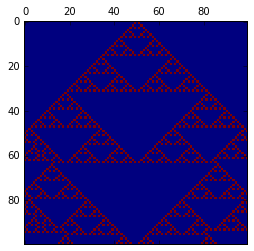

In [41]:
# Some test code:
def irun_ca (rule_num=90, n=100, t_max=100):
    show_grid (run_ca (rule_num, n, t_max).transpose ())
    
irun_ca (90) # Try 90, 169, and 37

In [42]:
from ipywidgets import interact

[1 0 0 1 0 1 0 1]


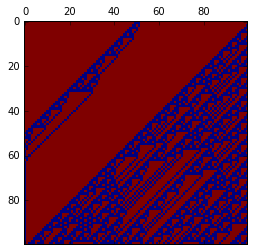

In [43]:
interact (irun_ca
          , rule_num=(0, 256, 1)
          , n=(10, 100, 10)
          , t_max=(10, 100, 10))